# Feature Engineering and Selection

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-модулей" data-toc-modified-id="Импорт-модулей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт модулей</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Оценка-базовой-модели" data-toc-modified-id="Оценка-базовой-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценка базовой модели</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#Настройка-Гиперпараметров" data-toc-modified-id="Настройка-Гиперпараметров-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Настройка Гиперпараметров</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создание новых признаков</a></span><ul class="toc-item"><li><span><a href="#NameLen" data-toc-modified-id="NameLen-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>NameLen</a></span></li><li><span><a href="#Title" data-toc-modified-id="Title-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>Title</code></a></span></li><li><span><a href="#Удаление-PassengerId-и-Name" data-toc-modified-id="Удаление-PassengerId-и-Name-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление <code>PassengerId</code> и <code>Name</code></a></span></li><li><span><a href="#Индикатор-пропуска-для-Age-и-Cabin" data-toc-modified-id="Индикатор-пропуска-для-Age-и-Cabin-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Индикатор пропуска для <code>Age</code> и <code>Cabin</code></a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Deck" data-toc-modified-id="Deck-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Deck</a></span></li><li><span><a href="#Добавление-логарифмов-признаков-Age,-Fare" data-toc-modified-id="Добавление-логарифмов-признаков-Age,-Fare-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Добавление логарифмов признаков <code>Age</code>, <code>Fare</code></a></span></li><li><span><a href="#Дискретизация-количественных-признаков" data-toc-modified-id="Дискретизация-количественных-признаков-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Дискретизация количественных признаков</a></span></li><li><span><a href="#Расчёт-произведения-Age-и-Fare" data-toc-modified-id="Расчёт-произведения-Age-и-Fare-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Расчёт произведения <code>Age</code> и <code>Fare</code></a></span></li><li><span><a href="#Признак-Family" data-toc-modified-id="Признак-Family-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Признак <code>Family</code></a></span></li><li><span><a href="#TicketPrefix" data-toc-modified-id="TicketPrefix-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>TicketPrefix</a></span></li><li><span><a href="#Подсчёт-количества-повторений" data-toc-modified-id="Подсчёт-количества-повторений-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Подсчёт количества повторений</a></span></li><li><span><a href="#Оценка-важности-признаков-с-учётом-новых" data-toc-modified-id="Оценка-важности-признаков-с-учётом-новых-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Оценка важности признаков с учётом новых</a></span></li><li><span><a href="#Настройка-гиперпараметров-для-модели-с-новыми-признаками" data-toc-modified-id="Настройка-гиперпараметров-для-модели-с-новыми-признаками-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Настройка гиперпараметров для модели с новыми признаками</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li></ul></div>

## Импорт модулей

In [1]:
from catboost import CatBoostClassifier, Pool, metrics, cv

from feature_engine.creation import MathFeatures
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.imputation import AddMissingIndicator, RandomSampleImputer
from feature_engine.transformation import LogCpTransformer

from joblib import load
from matplotlib import pyplot as plt
import numpy as np
import optuna
from optuna.integration import CatBoostPruningCallback
import pandas as pd
import shap
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

CV=5
N_JOBS = -1
N_TRIALS = 1000

sklearn.set_config(transform_output="pandas")

%matplotlib inline

## Загрузка данных

In [62]:
X_train, y_train = load("train_set.joblib")
X_test, y_test = load("test_set.joblib")

## Оценка базовой модели

### Cross validation

In [3]:
train_pool = Pool(
    data=X_train.fillna(-999),
    label=y_train, 
    cat_features=['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
    text_features=['Name']
)

model_params = dict(
    iterations=2000,
    depth=3,
    loss_function = metrics.Logloss(),
    custom_loss=[metrics.Accuracy(), metrics.AUC()],
    l2_leaf_reg=100,
)

cv_data = cv(
    pool=train_pool, 
    params=model_params, 
    logging_level='Silent', 
    plot=True,
    nfold=CV,
)

best_id = np.argmax(cv_data['test-Accuracy-mean'])

print(f"Best mean accuracy: {np.round(cv_data['test-Accuracy-mean'][best_id], 3)}")
print(f"Accuracy std: {np.round(cv_data['test-Accuracy-std'][best_id], 4)}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best mean accuracy: 0.847
Accuracy std: 0.0403


In [4]:
model = CatBoostClassifier(
    iterations=2000,
    depth=3,
    l2_leaf_reg=100,
    loss_function=metrics.Logloss(),
    cat_features=['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
    text_features=['Name'],
    eval_metric="Accuracy",
    verbose=False
)

model.fit(
    X_train.fillna(-999),
    y_train,
    eval_set=[(X_test.fillna(-999), y_test)],
    early_stopping_rounds=150,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [5]:
shap.initjs() 

shap_values = model.get_feature_importance(
    Pool(
        X_train.fillna(-999), 
        y_train,
        cat_features=['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
        text_features=['Name'],
    ), 
    type='ShapValues'
)

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

In [6]:
shap.force_plot(expected_value, shap_values, X_train.fillna(-999))

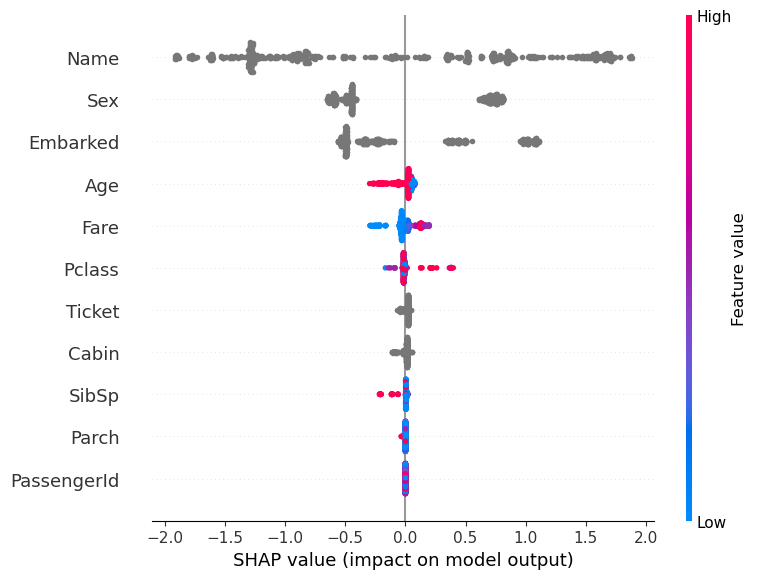

In [7]:
shap.summary_plot(shap_values, X_train.fillna(-999))

### Настройка Гиперпараметров

In [8]:
def objective(trial):
    
    model_params = dict(
        iterations=2000,#trial.suggest_int('iterations', 200, 1000),
#         learning_rate=trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        depth=trial.suggest_int("depth", 1, 7),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 10, 200, log=True),
        loss_function=metrics.Logloss(),
        cat_features=['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
        text_features=['Name'],
        eval_metric="Accuracy",
        verbose=False
    )
    
    
    model = CatBoostClassifier(**model_params)
    
    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")

    model.fit(
        X_train.fillna(-999),
        y_train,
        eval_set=[(X_test.fillna(-999), y_test)],
        early_stopping_rounds=100,
        callbacks=[pruning_callback],
    )
    
    pruning_callback.check_pruned()
    
    return accuracy_score(y_test, model.predict(X_test.fillna(-999)))

In [9]:
study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),
    direction='maximize'
)
study.optimize(objective, n_trials=N_TRIALS)

[I 2023-11-12 08:16:25,830] A new study created in memory with name: no-name-47ab62e3-13f9-4a47-8b05-cb381025a136
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:26,041] Trial 0 finished with value: 0.7877094972067039 and parameters: {'depth': 1, 'l2_leaf_reg': 153.98269659805393}. Best is trial 0 with value: 0.7877094972067039.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:26,222] Trial 1 finished with value: 0.8044692737430168 and parameters: {'depth': 3, 'l2_leaf_reg': 10.481607371859935}. Best is trial 1 with value: 0.8044692737430168.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:26,592] Trial 2 finished with value: 0.7988826815642458 and parameters: {'depth': 5, 'l2_leaf_reg': 31.64425352301126}. Best is trial 1 with value: 0.8044692737430168.
CatBo

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:31,734] Trial 42 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:16:31,773] Trial 43 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:16:31,812] Trial 44 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:16:32,011] Trial 45 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 11.868900614130315}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:32,047] Trial 46 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:16:32,250] Trial 47 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 10.69219506489485}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:37,659] Trial 83 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 11.789292262434403}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:37,859] Trial 84 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 13.691833031630608}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:38,061] Trial 85 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 14.790227652727078}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:43,514] Trial 116 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 17.005696951558}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:43,708] Trial 117 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 10.631596614754665}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:43,903] Trial 118 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 11.7962779739131}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-1

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:49,282] Trial 146 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 20.738264124882985}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:49,316] Trial 147 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:16:49,520] Trial 148 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 66.94099670387038}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:49,575] Trial 149 pruned. Trial was pruned at iteration 11.
[I 2023-11-12 08:16:49,771] Trial 150 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 13.126163089437117}. 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:54,945] Trial 176 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 14.468456626685352}. Best is trial 11 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:55,150] Trial 177 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 93.24761381812286}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:16:55,349] Trial 178 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 87.42305781993672}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:00,536] Trial 204 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 152.6693176084623}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:00,750] Trial 205 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 126.2632509080732}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:00,953] Trial 206 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 158.3819687446672}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:06,226] Trial 232 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 142.158216231003}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:06,429] Trial 233 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 130.42426255206894}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:06,635] Trial 234 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 165.28380989991842}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:12,011] Trial 260 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 146.02668533494744}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:12,218] Trial 261 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 125.93972898468742}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:12,321] Trial 262 pruned. Trial was pruned at iteration 23.
[I 2023-11-12 08:17:12,523] Trial 263 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 140.23614406168454}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:17,752] Trial 289 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 135.2409898877733}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:17,955] Trial 290 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 119.82160616800597}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:18,162] Trial 291 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 102.9054010107208}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 

[I 2023-11-12 08:17:23,355] Trial 317 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 136.00898458608924}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:23,392] Trial 318 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:17:23,599] Trial 319 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 159.70347339643433}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:23,805] Trial 320 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 178.8197640351062}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:24,003] 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:29,299] Trial 346 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 146.71737592250653}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:29,539] Trial 347 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 171.0139360221994}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:29,759] Trial 348 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 138.58654670076416}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I

[I 2023-11-12 08:17:35,134] Trial 374 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 91.82373070287763}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:35,341] Trial 375 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 99.43483295325717}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:35,555] Trial 376 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 142.92231547643829}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:35,767] Trial 377 finished with value: 0.8156424581005587 and parameters: {'depth': 4, '

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:41,119] Trial 404 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 170.08743323293976}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:41,328] Trial 405 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 145.44164798182777}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:41,539] Trial 406 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 105.81821635968006}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:47,383] Trial 432 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 53.161708827335545}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:47,593] Trial 433 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 75.84132654805782}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:47,811] Trial 434 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 35.6631733778462}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:53,428] Trial 460 finished with value: 0.7988826815642458 and parameters: {'depth': 5, 'l2_leaf_reg': 151.1125590501084}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:53,637] Trial 461 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 131.49162289103938}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:53,848] Trial 462 finished with value: 0.8044692737430168 and parameters: {'depth': 4, 'l2_leaf_reg': 199.27937790281476}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:59,347] Trial 489 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 119.89100263101128}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:59,561] Trial 490 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 71.81082426681628}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:17:59,776] Trial 491 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 40.39263374588272}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:05,381] Trial 519 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 18.392101994770435}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:05,594] Trial 520 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 147.1735952085392}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:05,811] Trial 521 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 20.439435070844194}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I

[I 2023-11-12 08:18:11,558] Trial 547 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 115.77361678416004}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:11,777] Trial 548 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 165.0816196225033}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:11,998] Trial 549 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 19.690986992474905}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:12,237] Trial 550 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:17,775] Trial 576 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 162.48439539816056}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:17,989] Trial 577 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 133.12971692575914}. Best is trial 177 with value: 0.8156424581005587.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:18,373] Trial 578 finished with value: 0.8212290502793296 and parameters: {'depth': 4, 'l2_leaf_reg': 41.06034061019105}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:24,425] Trial 606 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:18:24,649] Trial 607 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 106.24743626936291}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:24,860] Trial 608 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 47.74373107696489}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:25,120] Trial 609 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 28.948806945241977}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is e

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:30,834] Trial 635 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 69.22430409717106}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:31,054] Trial 636 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 50.29413568784149}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:31,273] Trial 637 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 39.332936900865235}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 

[I 2023-11-12 08:18:37,054] Trial 663 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 137.79395169029476}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:37,275] Trial 664 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 37.7736393496426}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:37,501] Trial 665 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 110.27597886635594}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:37,723] Trial 666 finished with value: 0.8100558659217877 and parameters: {'depth': 4, '

[I 2023-11-12 08:18:43,193] Trial 692 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 132.87893843863804}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:43,413] Trial 693 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 31.31578473450373}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:43,630] Trial 694 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 66.50347308041769}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:43,673] Trial 695 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:18:43,897] T

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:50,073] Trial 722 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 57.829947433303865}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:50,300] Trial 723 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 137.68823632406176}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:50,529] Trial 724 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 21.43748552478116}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:56,601] Trial 750 finished with value: 0.7988826815642458 and parameters: {'depth': 5, 'l2_leaf_reg': 147.74988155600204}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:56,820] Trial 751 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 19.805799929036727}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:18:57,051] Trial 752 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 16.440965060487148}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:02,996] Trial 779 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 132.1341813191929}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:03,223] Trial 780 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 151.29742827760037}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:03,447] Trial 781 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 59.85244281954189}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:09,282] Trial 808 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 49.463034797928906}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:09,505] Trial 809 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 140.07518418484136}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:09,728] Trial 810 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 127.99341285405816}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[

[I 2023-11-12 08:19:15,615] Trial 837 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 138.060026972275}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:15,847] Trial 838 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 97.35358815189466}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:16,075] Trial 839 finished with value: 0.8044692737430168 and parameters: {'depth': 3, 'l2_leaf_reg': 156.93326059283186}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:16,315] Trial 840 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:22,280] Trial 866 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 181.21255627934724}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:22,502] Trial 867 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 47.34315469800619}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:22,734] Trial 868 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 130.64273175716107}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I

[I 2023-11-12 08:19:28,803] Trial 894 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 140.3984059201778}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:29,062] Trial 895 finished with value: 0.7932960893854749 and parameters: {'depth': 4, 'l2_leaf_reg': 23.039522861410116}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:29,288] Trial 896 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 165.37268021205205}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:29,513] Trial 897 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 

[I 2023-11-12 08:19:35,869] Trial 923 finished with value: 0.7932960893854749 and parameters: {'depth': 4, 'l2_leaf_reg': 32.019727889926905}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:36,094] Trial 924 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 47.34638371717148}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:36,320] Trial 925 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 142.01584991167937}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:36,554] Trial 926 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:42,925] Trial 952 finished with value: 0.8044692737430168 and parameters: {'depth': 4, 'l2_leaf_reg': 198.35997197947717}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:43,154] Trial 953 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 134.3152329000898}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:43,399] Trial 954 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 144.25182317002142}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I

[I 2023-11-12 08:19:49,200] Trial 980 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 159.13062162472087}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:49,465] Trial 981 finished with value: 0.7988826815642458 and parameters: {'depth': 4, 'l2_leaf_reg': 26.693057882255662}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:49,698] Trial 982 finished with value: 0.8156424581005587 and parameters: {'depth': 4, 'l2_leaf_reg': 130.75112563801184}. Best is trial 578 with value: 0.8212290502793296.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:19:49,928] Trial 983 finished with value: 0.8156424581005587 and parameters: {'depth': 4,

In [10]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.8212290502793296
  Params: 
    depth: 4
    l2_leaf_reg: 41.06034061019105


### Feature Importance

In [11]:
model = CatBoostClassifier(
    iterations=2000,
    depth=4,
    l2_leaf_reg=41,
    loss_function=metrics.Logloss(),
    cat_features=['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
    text_features=['Name'],
    eval_metric="Accuracy",
    verbose=False
)

model.fit(
    X_train.fillna(-999),
    y_train,
    eval_set=[(X_test.fillna(-999), y_test)],
    early_stopping_rounds=150,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [12]:
shap_values = model.get_feature_importance(
    Pool(
        X_train.fillna(-999), 
        y_train,
        cat_features=['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
        text_features=['Name'],
    ), 
    type='ShapValues'
)

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.force_plot(expected_value, shap_values[0,:], X_train.fillna(-999).iloc[0,:])

In [13]:
shap.force_plot(expected_value, shap_values, X_train.fillna(-999))

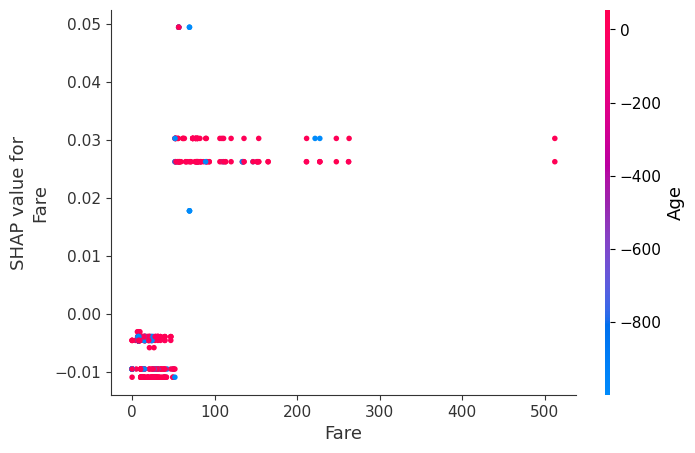

In [14]:
shap.dependence_plot("Fare", shap_values, X_train.fillna(-999), interaction_index="Age")

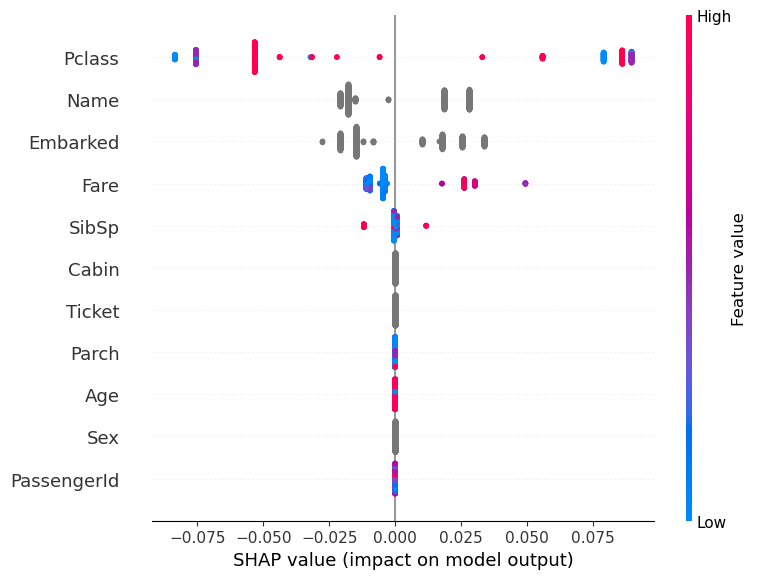

In [15]:
shap.summary_plot(shap_values, X_train.fillna(-999))

In [16]:
(
    pd.
    DataFrame(
        model.get_feature_importance(
            Pool(
                X_train.fillna(-999), 
                y_train,
                cat_features=['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
                text_features=['Name'],
            ), 
        ),
        index=X_train.columns
    )
    .reset_index()
    .rename(columns={'index': 'feature', 0: 'importance'})
    .sort_values(by='importance', ascending=False)
)

feature  importance
2          Name   81.645068
1        Pclass   10.129980
8          Fare    4.136411
5         SibSp    4.088541
0   PassengerId    0.000000
3           Sex    0.000000
4           Age    0.000000
6         Parch    0.000000
7        Ticket    0.000000
9         Cabin    0.000000
10     Embarked    0.000000

## Создание новых признаков

In [17]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         2
dtype: int64

In [18]:
X_train.head()

PassengerId  Pclass                                         Name     Sex   
692          693       3                                 Lam, Mr. Ali    male  \
481          482       2             Frost, Mr. Anthony Wood "Archie"    male   
527          528       1                           Farthing, Mr. John    male   
855          856       3                   Aks, Mrs. Sam (Leah Rosen)  female   
801          802       2  Collyer, Mrs. Harvey (Charlotte Annie Tate)  female   

      Age  SibSp  Parch      Ticket      Fare Cabin Embarked  
692   NaN      0      0        1601   56.4958   NaN        S  
481   NaN      0      0      239854    0.0000   NaN        S  
527   NaN      0      0    PC 17483  221.7792   C95        S  
855  18.0      0      1      392091    9.3500   NaN        S  
801  31.0      1      1  C.A. 31921   26.2500   NaN        S

### NameLen

In [19]:
name_len_adder = FunctionTransformer(lambda x: x.assign(NameLen=x.Name.str.len()))

X_train = name_len_adder.fit_transform(X_train)
display(X_train.head())

X_test = name_len_adder.transform(X_test)
display(X_test.head())

PassengerId  Pclass                                         Name     Sex   
692          693       3                                 Lam, Mr. Ali    male  \
481          482       2             Frost, Mr. Anthony Wood "Archie"    male   
527          528       1                           Farthing, Mr. John    male   
855          856       3                   Aks, Mrs. Sam (Leah Rosen)  female   
801          802       2  Collyer, Mrs. Harvey (Charlotte Annie Tate)  female   

      Age  SibSp  Parch      Ticket      Fare Cabin Embarked  NameLen  
692   NaN      0      0        1601   56.4958   NaN        S       12  
481   NaN      0      0      239854    0.0000   NaN        S       32  
527   NaN      0      0    PC 17483  221.7792   C95        S       18  
855  18.0      0      1      392091    9.3500   NaN        S       26  
801  31.0      1      1  C.A. 31921   26.2500   NaN        S       43

PassengerId  Pclass                               Name     Sex   Age   
565          566       3               Davies, Mr. Alfred J    male  24.0  \
160          161       3           Cribb, Mr. John Hatfield    male  44.0   
553          554       3  Leeni, Mr. Fahim ("Philip Zenni")    male  22.0   
860          861       3            Hansen, Mr. Claus Peter    male  41.0   
241          242       3     Murphy, Miss. Katherine "Kate"  female   NaN   

     SibSp  Parch     Ticket     Fare Cabin Embarked  NameLen  
565      2      0  A/4 48871  24.1500   NaN        S       20  
160      0      1     371362  16.1000   NaN        S       24  
553      0      0       2620   7.2250   NaN        C       33  
860      2      0     350026  14.1083   NaN        S       23  
241      1      0     367230  15.5000   NaN        Q       30

### `Title`

In [20]:
def add_title(X, y=None, group_rare=True):
    title = X.Name.str.extract(pat=r"\b,\s(.+?)\.\s[\b(]?")
    title = pd.Series(title[0], name="Title").str.lower()

    if group_rare:
        title = title.where(
            title.isin(["mr", "miss", "mrs", "master"]), "aristocratic"
        )

    return pd.concat([X, title], axis="columns")

title_adder = FunctionTransformer(add_title)


X_train = title_adder.fit_transform(X_train)
display(X_train.head())

X_test = title_adder.transform(X_test)
display(X_test.head())

PassengerId  Pclass                                         Name     Sex   
692          693       3                                 Lam, Mr. Ali    male  \
481          482       2             Frost, Mr. Anthony Wood "Archie"    male   
527          528       1                           Farthing, Mr. John    male   
855          856       3                   Aks, Mrs. Sam (Leah Rosen)  female   
801          802       2  Collyer, Mrs. Harvey (Charlotte Annie Tate)  female   

      Age  SibSp  Parch      Ticket      Fare Cabin Embarked  NameLen Title  
692   NaN      0      0        1601   56.4958   NaN        S       12    mr  
481   NaN      0      0      239854    0.0000   NaN        S       32    mr  
527   NaN      0      0    PC 17483  221.7792   C95        S       18    mr  
855  18.0      0      1      392091    9.3500   NaN        S       26   mrs  
801  31.0      1      1  C.A. 31921   26.2500   NaN        S       43   mrs

PassengerId  Pclass                               Name     Sex   Age   
565          566       3               Davies, Mr. Alfred J    male  24.0  \
160          161       3           Cribb, Mr. John Hatfield    male  44.0   
553          554       3  Leeni, Mr. Fahim ("Philip Zenni")    male  22.0   
860          861       3            Hansen, Mr. Claus Peter    male  41.0   
241          242       3     Murphy, Miss. Katherine "Kate"  female   NaN   

     SibSp  Parch     Ticket     Fare Cabin Embarked  NameLen Title  
565      2      0  A/4 48871  24.1500   NaN        S       20    mr  
160      0      1     371362  16.1000   NaN        S       24    mr  
553      0      0       2620   7.2250   NaN        C       33    mr  
860      2      0     350026  14.1083   NaN        S       23    mr  
241      1      0     367230  15.5000   NaN        Q       30  miss

### Удаление `PassengerId` и `Name`

In [21]:
drop_cols = FunctionTransformer(
    lambda x: x.drop(columns=['PassengerId', 'Name'])
)

X_train = drop_cols.fit_transform(X_train)
display(X_train.head())

X_test = drop_cols.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare Cabin Embarked   
692       3    male   NaN      0      0        1601   56.4958   NaN        S  \
481       2    male   NaN      0      0      239854    0.0000   NaN        S   
527       1    male   NaN      0      0    PC 17483  221.7792   C95        S   
855       3  female  18.0      0      1      392091    9.3500   NaN        S   
801       2  female  31.0      1      1  C.A. 31921   26.2500   NaN        S   

     NameLen Title  
692       12    mr  
481       32    mr  
527       18    mr  
855       26   mrs  
801       43   mrs

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500   NaN        S  \
160       3    male  44.0      0      1     371362  16.1000   NaN        S   
553       3    male  22.0      0      0       2620   7.2250   NaN        C   
860       3    male  41.0      2      0     350026  14.1083   NaN        S   
241       3  female   NaN      1      0     367230  15.5000   NaN        Q   

     NameLen Title  
565       20    mr  
160       24    mr  
553       33    mr  
860       23    mr  
241       30  miss

### Индикатор пропуска для `Age` и `Cabin`

In [22]:
missing_indicator = AddMissingIndicator(
    variables=['Age', 'Cabin']
)

X_train = missing_indicator.fit_transform(X_train)
display(X_train.head())

X_test = missing_indicator.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare Cabin Embarked   
692       3    male   NaN      0      0        1601   56.4958   NaN        S  \
481       2    male   NaN      0      0      239854    0.0000   NaN        S   
527       1    male   NaN      0      0    PC 17483  221.7792   C95        S   
855       3  female  18.0      0      1      392091    9.3500   NaN        S   
801       2  female  31.0      1      1  C.A. 31921   26.2500   NaN        S   

     NameLen Title  Age_na  Cabin_na  
692       12    mr       1         1  
481       32    mr       1         1  
527       18    mr       1         0  
855       26   mrs       0         1  
801       43   mrs       0         1

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500   NaN        S  \
160       3    male  44.0      0      1     371362  16.1000   NaN        S   
553       3    male  22.0      0      0       2620   7.2250   NaN        C   
860       3    male  41.0      2      0     350026  14.1083   NaN        S   
241       3  female   NaN      1      0     367230  15.5000   NaN        Q   

     NameLen Title  Age_na  Cabin_na  
565       20    mr       0         1  
160       24    mr       0         1  
553       33    mr       0         1  
860       23    mr       0         1  
241       30  miss       1         1

### Заполнение пропусков

In [23]:
random_imputer = RandomSampleImputer(
    variables=['Age', 'Embarked']
)

X_train = random_imputer.fit_transform(X_train)
display(X_train.head())

X_test = random_imputer.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare Cabin Embarked   
692       3    male  32.0      0      0        1601   56.4958   NaN        S  \
481       2    male  39.0      0      0      239854    0.0000   NaN        S   
527       1    male  30.0      0      0    PC 17483  221.7792   C95        S   
855       3  female  18.0      0      1      392091    9.3500   NaN        S   
801       2  female  31.0      1      1  C.A. 31921   26.2500   NaN        S   

     NameLen Title  Age_na  Cabin_na  
692       12    mr       1         1  
481       32    mr       1         1  
527       18    mr       1         0  
855       26   mrs       0         1  
801       43   mrs       0         1

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500   NaN        S  \
160       3    male  44.0      0      1     371362  16.1000   NaN        S   
553       3    male  22.0      0      0       2620   7.2250   NaN        C   
860       3    male  41.0      2      0     350026  14.1083   NaN        S   
241       3  female  33.0      1      0     367230  15.5000   NaN        Q   

     NameLen Title  Age_na  Cabin_na  
565       20    mr       0         1  
160       24    mr       0         1  
553       33    mr       0         1  
860       23    mr       0         1  
241       30  miss       1         1

In [24]:
cabin_imputer = FunctionTransformer(
    lambda x: x.assign(Cabin=lambda x: x.Cabin.fillna('unknown'))
)

X_train = cabin_imputer.fit_transform(X_train)
display(X_train.head())

X_test = cabin_imputer.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin   
692       3    male  32.0      0      0        1601   56.4958  unknown  \
481       2    male  39.0      0      0      239854    0.0000  unknown   
527       1    male  30.0      0      0    PC 17483  221.7792      C95   
855       3  female  18.0      0      1      392091    9.3500  unknown   
801       2  female  31.0      1      1  C.A. 31921   26.2500  unknown   

    Embarked  NameLen Title  Age_na  Cabin_na  
692        S       12    mr       1         1  
481        S       32    mr       1         1  
527        S       18    mr       1         0  
855        S       26   mrs       0         1  
801        S       43   mrs       0         1

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
160       3    male  44.0      0      1     371362  16.1000  unknown        S   
553       3    male  22.0      0      0       2620   7.2250  unknown        C   
860       3    male  41.0      2      0     350026  14.1083  unknown        S   
241       3  female  33.0      1      0     367230  15.5000  unknown        Q   

     NameLen Title  Age_na  Cabin_na  
565       20    mr       0         1  
160       24    mr       0         1  
553       33    mr       0         1  
860       23    mr       0         1  
241       30  miss       1         1

### Deck

In [25]:
def get_deck(X, y=None):
    res = X.copy()
    res['Deck'] = res.Cabin.copy()
    res['Deck'] = res['Deck'].str.replace(pat=r'.*?([a-zA-z]+).*', repl=r'\1', regex=True)
    
    return res

deck_finder = FunctionTransformer(get_deck)

In [26]:
X_train = deck_finder.fit_transform(X_train)
display(X_train.head())

X_test = deck_finder.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin   
692       3    male  32.0      0      0        1601   56.4958  unknown  \
481       2    male  39.0      0      0      239854    0.0000  unknown   
527       1    male  30.0      0      0    PC 17483  221.7792      C95   
855       3  female  18.0      0      1      392091    9.3500  unknown   
801       2  female  31.0      1      1  C.A. 31921   26.2500  unknown   

    Embarked  NameLen Title  Age_na  Cabin_na     Deck  
692        S       12    mr       1         1  unknown  
481        S       32    mr       1         1  unknown  
527        S       18    mr       1         0        C  
855        S       26   mrs       0         1  unknown  
801        S       43   mrs       0         1  unknown

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
160       3    male  44.0      0      1     371362  16.1000  unknown        S   
553       3    male  22.0      0      0       2620   7.2250  unknown        C   
860       3    male  41.0      2      0     350026  14.1083  unknown        S   
241       3  female  33.0      1      0     367230  15.5000  unknown        Q   

     NameLen Title  Age_na  Cabin_na     Deck  
565       20    mr       0         1  unknown  
160       24    mr       0         1  unknown  
553       33    mr       0         1  unknown  
860       23    mr       0         1  unknown  
241       30  miss       1         1  unknown

### Добавление логарифмов признаков `Age`, `Fare`

In [27]:
log_cp_tr = LogCpTransformer(variables = ['Age', 'Fare'], C='auto')

X_train[['Age_log', 'Fare_log']] = log_cp_tr.fit_transform(X_train[['Age', 'Fare']])
print(log_cp_tr.C_)
display(X_train.head())

X_test[['Age_log', 'Fare_log']] = log_cp_tr.transform(X_test[['Age', 'Fare']])
display(X_test.head())

{'Age': 1.42, 'Fare': 1.0}


Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin   
692       3    male  32.0      0      0        1601   56.4958  unknown  \
481       2    male  39.0      0      0      239854    0.0000  unknown   
527       1    male  30.0      0      0    PC 17483  221.7792      C95   
855       3  female  18.0      0      1      392091    9.3500  unknown   
801       2  female  31.0      1      1  C.A. 31921   26.2500  unknown   

    Embarked  NameLen Title  Age_na  Cabin_na     Deck   Age_log  Fare_log  
692        S       12    mr       1         1  unknown  3.509155  4.051712  
481        S       32    mr       1         1  unknown  3.699325  0.000000  
527        S       18    mr       1         0        C  3.447445  5.406181  
855        S       26   mrs       0         1  unknown  2.966303  2.336987  
801        S       43   mrs       0         1  unknown  3.478776  3.305054

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
160       3    male  44.0      0      1     371362  16.1000  unknown        S   
553       3    male  22.0      0      0       2620   7.2250  unknown        C   
860       3    male  41.0      2      0     350026  14.1083  unknown        S   
241       3  female  33.0      1      0     367230  15.5000  unknown        Q   

     NameLen Title  Age_na  Cabin_na     Deck   Age_log  Fare_log  
565       20    mr       0         1  unknown  3.235536  3.224858  
160       24    mr       0         1  unknown  3.815953  2.839078  
553       33    mr       0         1  unknown  3.153590  2.107178  
860       23    mr       0         1  unknown  3.747620  2.715244  
241       30  miss       1         1  unknown  3.538638  2.803360

### Дискретизация количественных признаков

In [28]:
discretizer = EqualFrequencyDiscretiser(q=10)

cols_for_discretization = ['Age', 'Fare', 'Age_log', 'Fare_log']
new_names = [col + '_discr' for col in cols_for_discretization]

X_train[new_names] = discretizer.fit_transform(X_train[cols_for_discretization])
display(X_train.head())

X_test[new_names] = discretizer.transform(X_test[cols_for_discretization])
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin   
692       3    male  32.0      0      0        1601   56.4958  unknown  \
481       2    male  39.0      0      0      239854    0.0000  unknown   
527       1    male  30.0      0      0    PC 17483  221.7792      C95   
855       3  female  18.0      0      1      392091    9.3500  unknown   
801       2  female  31.0      1      1  C.A. 31921   26.2500  unknown   

    Embarked  NameLen Title  Age_na  Cabin_na     Deck   Age_log  Fare_log   
692        S       12    mr       1         1  unknown  3.509155  4.051712  \
481        S       32    mr       1         1  unknown  3.699325  0.000000   
527        S       18    mr       1         0        C  3.447445  5.406181   
855        S       26   mrs       0         1  unknown  2.966303  2.336987   
801        S       43   mrs       0         1  unknown  3.478776  3.305054   

     Age_discr  Fare_discr  Age_log_discr  Fare_log_discr  
692          5           8              5               8  
481          7           0              7               0  
527          5           9              5               9  
855          1           3              1               3  
801          5           6              5               6

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
160       3    male  44.0      0      1     371362  16.1000  unknown        S   
553       3    male  22.0      0      0       2620   7.2250  unknown        C   
860       3    male  41.0      2      0     350026  14.1083  unknown        S   
241       3  female  33.0      1      0     367230  15.5000  unknown        Q   

     NameLen Title  Age_na  Cabin_na     Deck   Age_log  Fare_log  Age_discr   
565       20    mr       0         1  unknown  3.235536  3.224858          3  \
160       24    mr       0         1  unknown  3.815953  2.839078          8   
553       33    mr       0         1  unknown  3.153590  2.107178          2   
860       23    mr       0         1  unknown  3.747620  2.715244          7   
241       30  miss       1         1  unknown  3.538638  2.803360          6   

     Fare_discr  Age_log_discr  Fare_log_discr  
565           6              3               6  
160           5              8               5  
553           0              2               0  
860           4              7               4  
241           5              6               5

### Расчёт произведения `Age` и `Fare`

In [29]:
multiplier = MathFeatures(
    variables=['Age', 'Fare'],
    func = "prod",
)

X_train = multiplier.fit_transform(X_train)
display(X_train.head())

X_test = multiplier.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin   
692       3    male  32.0      0      0        1601   56.4958  unknown  \
481       2    male  39.0      0      0      239854    0.0000  unknown   
527       1    male  30.0      0      0    PC 17483  221.7792      C95   
855       3  female  18.0      0      1      392091    9.3500  unknown   
801       2  female  31.0      1      1  C.A. 31921   26.2500  unknown   

    Embarked  NameLen  ... Age_na  Cabin_na     Deck   Age_log  Fare_log   
692        S       12  ...      1         1  unknown  3.509155  4.051712  \
481        S       32  ...      1         1  unknown  3.699325  0.000000   
527        S       18  ...      1         0        C  3.447445  5.406181   
855        S       26  ...      0         1  unknown  2.966303  2.336987   
801        S       43  ...      0         1  unknown  3.478776  3.305054   

     Age_discr  Fare_discr  Age_log_discr  Fare_log_discr  prod_Age_Fare  
692          5           8              5               8      1807.8656  
481          7           0              7               0         0.0000  
527          5           9              5               9      6653.3760  
855          1           3              1               3       168.3000  
801          5           6              5               6       813.7500  

[5 rows x 21 columns]

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
160       3    male  44.0      0      1     371362  16.1000  unknown        S   
553       3    male  22.0      0      0       2620   7.2250  unknown        C   
860       3    male  41.0      2      0     350026  14.1083  unknown        S   
241       3  female  33.0      1      0     367230  15.5000  unknown        Q   

     NameLen  ... Age_na  Cabin_na     Deck   Age_log  Fare_log  Age_discr   
565       20  ...      0         1  unknown  3.235536  3.224858          3  \
160       24  ...      0         1  unknown  3.815953  2.839078          8   
553       33  ...      0         1  unknown  3.153590  2.107178          2   
860       23  ...      0         1  unknown  3.747620  2.715244          7   
241       30  ...      1         1  unknown  3.538638  2.803360          6   

     Fare_discr  Age_log_discr  Fare_log_discr  prod_Age_Fare  
565           6              3               6       579.6000  
160           5              8               5       708.4000  
553           0              2               0       158.9500  
860           4              7               4       578.4403  
241           5              6               5       511.5000  

[5 rows x 21 columns]

### Признак `Family`

In [30]:
def add_family(X, y=None):
    return X.assign(Family=X.SibSp + X.Parch)

family_adder = FunctionTransformer(add_family)


X_train = family_adder.fit_transform(X_train)
display(X_train.head())

X_test = family_adder.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin   
692       3    male  32.0      0      0        1601   56.4958  unknown  \
481       2    male  39.0      0      0      239854    0.0000  unknown   
527       1    male  30.0      0      0    PC 17483  221.7792      C95   
855       3  female  18.0      0      1      392091    9.3500  unknown   
801       2  female  31.0      1      1  C.A. 31921   26.2500  unknown   

    Embarked  NameLen  ... Cabin_na     Deck   Age_log  Fare_log  Age_discr   
692        S       12  ...        1  unknown  3.509155  4.051712          5  \
481        S       32  ...        1  unknown  3.699325  0.000000          7   
527        S       18  ...        0        C  3.447445  5.406181          5   
855        S       26  ...        1  unknown  2.966303  2.336987          1   
801        S       43  ...        1  unknown  3.478776  3.305054          5   

     Fare_discr  Age_log_discr  Fare_log_discr  prod_Age_Fare  Family  
692           8              5               8      1807.8656       0  
481           0              7               0         0.0000       0  
527           9              5               9      6653.3760       0  
855           3              1               3       168.3000       1  
801           6              5               6       813.7500       2  

[5 rows x 22 columns]

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
565       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
160       3    male  44.0      0      1     371362  16.1000  unknown        S   
553       3    male  22.0      0      0       2620   7.2250  unknown        C   
860       3    male  41.0      2      0     350026  14.1083  unknown        S   
241       3  female  33.0      1      0     367230  15.5000  unknown        Q   

     NameLen  ... Cabin_na     Deck   Age_log  Fare_log  Age_discr   
565       20  ...        1  unknown  3.235536  3.224858          3  \
160       24  ...        1  unknown  3.815953  2.839078          8   
553       33  ...        1  unknown  3.153590  2.107178          2   
860       23  ...        1  unknown  3.747620  2.715244          7   
241       30  ...        1  unknown  3.538638  2.803360          6   

     Fare_discr  Age_log_discr  Fare_log_discr  prod_Age_Fare  Family  
565           6              3               6       579.6000       2  
160           5              8               5       708.4000       1  
553           0              2               0       158.9500       0  
860           4              7               4       578.4403       2  
241           5              6               5       511.5000       1  

[5 rows x 22 columns]

### TicketPrefix

In [71]:
def get_ticket_prefix(X, y=None):
    res = X.copy()
    res['TicketPrefix'] = res['Ticket'].str.replace(pat=r'.*?([\D\.,/]+).*', repl=r'pref_\1', regex=True)
    
    return res

ticket_prefixer = FunctionTransformer(get_ticket_prefix)

In [72]:
X_train = ticket_prefixer.fit_transform(X_train)
display(X_train.head())

X_test = ticket_prefixer.transform(X_test)
display(X_test.head())

PassengerId  Pclass                                         Name     Sex   
692          693       3                                 Lam, Mr. Ali    male  \
481          482       2             Frost, Mr. Anthony Wood "Archie"    male   
527          528       1                           Farthing, Mr. John    male   
855          856       3                   Aks, Mrs. Sam (Leah Rosen)  female   
801          802       2  Collyer, Mrs. Harvey (Charlotte Annie Tate)  female   

      Age  SibSp  Parch      Ticket      Fare Cabin Embarked TicketPrefix  
692   NaN      0      0        1601   56.4958   NaN        S         1601  
481   NaN      0      0      239854    0.0000   NaN        S       239854  
527   NaN      0      0    PC 17483  221.7792   C95        S     pref_PC   
855  18.0      0      1      392091    9.3500   NaN        S       392091  
801  31.0      1      1  C.A. 31921   26.2500   NaN        S   pref_C.A.

PassengerId  Pclass                               Name     Sex   Age   
565          566       3               Davies, Mr. Alfred J    male  24.0  \
160          161       3           Cribb, Mr. John Hatfield    male  44.0   
553          554       3  Leeni, Mr. Fahim ("Philip Zenni")    male  22.0   
860          861       3            Hansen, Mr. Claus Peter    male  41.0   
241          242       3     Murphy, Miss. Katherine "Kate"  female   NaN   

     SibSp  Parch     Ticket     Fare Cabin Embarked TicketPrefix  
565      2      0  A/4 48871  24.1500   NaN        S      pref_A/  
160      0      1     371362  16.1000   NaN        S       371362  
553      0      0       2620   7.2250   NaN        C         2620  
860      2      0     350026  14.1083   NaN        S       350026  
241      1      0     367230  15.5000   NaN        Q       367230

### Подсчёт количества повторений

In [31]:
class ValueCounter(BaseEstimator, TransformerMixin):
    def __init__(self, col_name):
        self.col_name = col_name
        
    def fit(self, X, y=None):
        self.counts = X[self.col_name].value_counts().reset_index()
        return self
    
    def transform(self, X, y=None):
        return (
            X
            .merge(self.counts, on=self.col_name, how='left')
            .rename(columns={'count': f'{self.col_name}Counts'})
            .fillna(1)
        )

In [32]:
tickets_counter = ValueCounter('Ticket')
X_train = tickets_counter.fit_transform(X_train)
display(X_train.head())

X_test = tickets_counter.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin Embarked   
0       3    male  32.0      0      0        1601   56.4958  unknown        S  \
1       2    male  39.0      0      0      239854    0.0000  unknown        S   
2       1    male  30.0      0      0    PC 17483  221.7792      C95        S   
3       3  female  18.0      0      1      392091    9.3500  unknown        S   
4       2  female  31.0      1      1  C.A. 31921   26.2500  unknown        S   

   NameLen  ...     Deck   Age_log  Fare_log Age_discr  Fare_discr   
0       12  ...  unknown  3.509155  4.051712         5           8  \
1       32  ...  unknown  3.699325  0.000000         7           0   
2       18  ...        C  3.447445  5.406181         5           9   
3       26  ...  unknown  2.966303  2.336987         1           3   
4       43  ...  unknown  3.478776  3.305054         5           6   

   Age_log_discr  Fare_log_discr  prod_Age_Fare  Family  TicketCounts  
0              5               8      1807.8656       0             6  
1              7               0         0.0000       0             1  
2              5               9      6653.3760       0             1  
3              1               3       168.3000       1             1  
4              5               6       813.7500       2             2  

[5 rows x 23 columns]

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
0       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
1       3    male  44.0      0      1     371362  16.1000  unknown        S   
2       3    male  22.0      0      0       2620   7.2250  unknown        C   
3       3    male  41.0      2      0     350026  14.1083  unknown        S   
4       3  female  33.0      1      0     367230  15.5000  unknown        Q   

   NameLen  ...     Deck   Age_log  Fare_log Age_discr  Fare_discr   
0       20  ...  unknown  3.235536  3.224858         3           6  \
1       24  ...  unknown  3.815953  2.839078         8           5   
2       33  ...  unknown  3.153590  2.107178         2           0   
3       23  ...  unknown  3.747620  2.715244         7           4   
4       30  ...  unknown  3.538638  2.803360         6           5   

   Age_log_discr  Fare_log_discr  prod_Age_Fare  Family  TicketCounts  
0              3               6       579.6000       2           1.0  
1              8               5       708.4000       1           1.0  
2              2               0       158.9500       0           1.0  
3              7               4       578.4403       2           1.0  
4              6               5       511.5000       1           1.0  

[5 rows x 23 columns]

In [33]:
cabin_counter = ValueCounter('Cabin')
X_train = cabin_counter.fit_transform(X_train)
display(X_train.head())

X_test = cabin_counter.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin Embarked   
0       3    male  32.0      0      0        1601   56.4958  unknown        S  \
1       2    male  39.0      0      0      239854    0.0000  unknown        S   
2       1    male  30.0      0      0    PC 17483  221.7792      C95        S   
3       3  female  18.0      0      1      392091    9.3500  unknown        S   
4       2  female  31.0      1      1  C.A. 31921   26.2500  unknown        S   

   NameLen  ...   Age_log  Fare_log  Age_discr Fare_discr  Age_log_discr   
0       12  ...  3.509155  4.051712          5          8              5  \
1       32  ...  3.699325  0.000000          7          0              7   
2       18  ...  3.447445  5.406181          5          9              5   
3       26  ...  2.966303  2.336987          1          3              1   
4       43  ...  3.478776  3.305054          5          6              5   

   Fare_log_discr  prod_Age_Fare  Family  TicketCounts  CabinCounts  
0               8      1807.8656       0             6          552  
1               0         0.0000       0             1          552  
2               9      6653.3760       0             1            1  
3               3       168.3000       1             1          552  
4               6       813.7500       2             2          552  

[5 rows x 24 columns]

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
0       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
1       3    male  44.0      0      1     371362  16.1000  unknown        S   
2       3    male  22.0      0      0       2620   7.2250  unknown        C   
3       3    male  41.0      2      0     350026  14.1083  unknown        S   
4       3  female  33.0      1      0     367230  15.5000  unknown        Q   

   NameLen  ...   Age_log  Fare_log  Age_discr Fare_discr  Age_log_discr   
0       20  ...  3.235536  3.224858          3          6              3  \
1       24  ...  3.815953  2.839078          8          5              8   
2       33  ...  3.153590  2.107178          2          0              2   
3       23  ...  3.747620  2.715244          7          4              7   
4       30  ...  3.538638  2.803360          6          5              6   

   Fare_log_discr  prod_Age_Fare  Family  TicketCounts  CabinCounts  
0               6       579.6000       2           1.0        552.0  
1               5       708.4000       1           1.0        552.0  
2               0       158.9500       0           1.0        552.0  
3               4       578.4403       2           1.0        552.0  
4               5       511.5000       1           1.0        552.0  

[5 rows x 24 columns]

In [34]:
cabin_counter = ValueCounter('Deck')
X_train = cabin_counter.fit_transform(X_train)
display(X_train.head())

X_test = cabin_counter.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin Embarked   
0       3    male  32.0      0      0        1601   56.4958  unknown        S  \
1       2    male  39.0      0      0      239854    0.0000  unknown        S   
2       1    male  30.0      0      0    PC 17483  221.7792      C95        S   
3       3  female  18.0      0      1      392091    9.3500  unknown        S   
4       2  female  31.0      1      1  C.A. 31921   26.2500  unknown        S   

   NameLen  ...  Fare_log  Age_discr  Fare_discr Age_log_discr   
0       12  ...  4.051712          5           8             5  \
1       32  ...  0.000000          7           0             7   
2       18  ...  5.406181          5           9             5   
3       26  ...  2.336987          1           3             1   
4       43  ...  3.305054          5           6             5   

   Fare_log_discr  prod_Age_Fare  Family  TicketCounts  CabinCounts   
0               8      1807.8656       0             6          552  \
1               0         0.0000       0             1          552   
2               9      6653.3760       0             1            1   
3               3       168.3000       1             1          552   
4               6       813.7500       2             2          552   

   DeckCounts  
0         552  
1         552  
2          41  
3         552  
4         552  

[5 rows x 25 columns]

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
0       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
1       3    male  44.0      0      1     371362  16.1000  unknown        S   
2       3    male  22.0      0      0       2620   7.2250  unknown        C   
3       3    male  41.0      2      0     350026  14.1083  unknown        S   
4       3  female  33.0      1      0     367230  15.5000  unknown        Q   

   NameLen  ...  Fare_log  Age_discr  Fare_discr Age_log_discr   
0       20  ...  3.224858          3           6             3  \
1       24  ...  2.839078          8           5             8   
2       33  ...  2.107178          2           0             2   
3       23  ...  2.715244          7           4             7   
4       30  ...  2.803360          6           5             6   

   Fare_log_discr  prod_Age_Fare  Family  TicketCounts  CabinCounts   
0               6       579.6000       2           1.0        552.0  \
1               5       708.4000       1           1.0        552.0   
2               0       158.9500       0           1.0        552.0   
3               4       578.4403       2           1.0        552.0   
4               5       511.5000       1           1.0        552.0   

   DeckCounts  
0         552  
1         552  
2         552  
3         552  
4         552  

[5 rows x 25 columns]

In [35]:
cabin_counter = ValueCounter('Pclass')
X_train = cabin_counter.fit_transform(X_train)
display(X_train.head())

X_test = cabin_counter.transform(X_test)
display(X_test.head())

Pclass     Sex   Age  SibSp  Parch      Ticket      Fare    Cabin Embarked   
0       3    male  32.0      0      0        1601   56.4958  unknown        S  \
1       2    male  39.0      0      0      239854    0.0000  unknown        S   
2       1    male  30.0      0      0    PC 17483  221.7792      C95        S   
3       3  female  18.0      0      1      392091    9.3500  unknown        S   
4       2  female  31.0      1      1  C.A. 31921   26.2500  unknown        S   

   NameLen  ... Age_discr  Fare_discr  Age_log_discr Fare_log_discr   
0       12  ...         5           8              5              8  \
1       32  ...         7           0              7              0   
2       18  ...         5           9              5              9   
3       26  ...         1           3              1              3   
4       43  ...         5           6              5              6   

   prod_Age_Fare  Family  TicketCounts  CabinCounts  DeckCounts  PclassCounts  
0      1807.8656       0             6          552         552           391  
1         0.0000       0             1          552         552           150  
2      6653.3760       0             1            1          41           171  
3       168.3000       1             1          552         552           391  
4       813.7500       2             2          552         552           150  

[5 rows x 26 columns]

Pclass     Sex   Age  SibSp  Parch     Ticket     Fare    Cabin Embarked   
0       3    male  24.0      2      0  A/4 48871  24.1500  unknown        S  \
1       3    male  44.0      0      1     371362  16.1000  unknown        S   
2       3    male  22.0      0      0       2620   7.2250  unknown        C   
3       3    male  41.0      2      0     350026  14.1083  unknown        S   
4       3  female  33.0      1      0     367230  15.5000  unknown        Q   

   NameLen  ... Age_discr  Fare_discr  Age_log_discr Fare_log_discr   
0       20  ...         3           6              3              6  \
1       24  ...         8           5              8              5   
2       33  ...         2           0              2              0   
3       23  ...         7           4              7              4   
4       30  ...         6           5              6              5   

   prod_Age_Fare  Family  TicketCounts  CabinCounts  DeckCounts  PclassCounts  
0       579.6000       2           1.0        552.0         552           391  
1       708.4000       1           1.0        552.0         552           391  
2       158.9500       0           1.0        552.0         552           391  
3       578.4403       2           1.0        552.0         552           391  
4       511.5000       1           1.0        552.0         552           391  

[5 rows x 26 columns]

### Оценка важности признаков с учётом новых

In [36]:
train_pool = Pool(
    data=X_train,
    label=y_train, 
    cat_features=[
        'Title', 
        'Pclass', 
        'Sex', 
        'Ticket', 
        'Cabin', 
        'Embarked', 
        'Age_na', 
        'Cabin_na',
        'Deck',
    ],
)

model_params = dict(
    iterations=2000,
    depth=4,
    loss_function = metrics.Logloss(),
    custom_loss=[metrics.Accuracy(), metrics.AUC()],
    l2_leaf_reg=100,
)

cv_data = cv(
    pool=train_pool, 
    params=model_params, 
    logging_level='Silent', 
    plot=True,
    nfold=CV,
)

best_id = np.argmax(cv_data['test-Accuracy-mean'])

print(f"Best mean accuracy: {np.round(cv_data['test-Accuracy-mean'][best_id], 3)}")
print(f"Accuracy std: {np.round(cv_data['test-Accuracy-std'][best_id], 4)}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best mean accuracy: 0.843
Accuracy std: 0.0256


In [37]:
model = CatBoostClassifier(
    iterations=2000,
    depth=4,
    l2_leaf_reg=100,
    loss_function=metrics.Logloss(),
    cat_features=[
        'Title', 
        'Pclass', 
        'Sex', 
        'Ticket', 
        'Cabin', 
        'Embarked', 
        'Age_na', 
        'Cabin_na',
        'Deck',
    ],
    eval_metric="Accuracy",
    verbose=False
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=150,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
shap_values = model.get_feature_importance(
    Pool(
        X_train, 
        y_train,
        cat_features=[
            'Title', 
            'Pclass', 
            'Sex', 
            'Ticket', 
            'Cabin', 
            'Embarked', 
            'Age_na', 
            'Cabin_na',
            'Deck',
        ],
    ), 
    type='ShapValues'
)

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.force_plot(expected_value, shap_values, X_train)

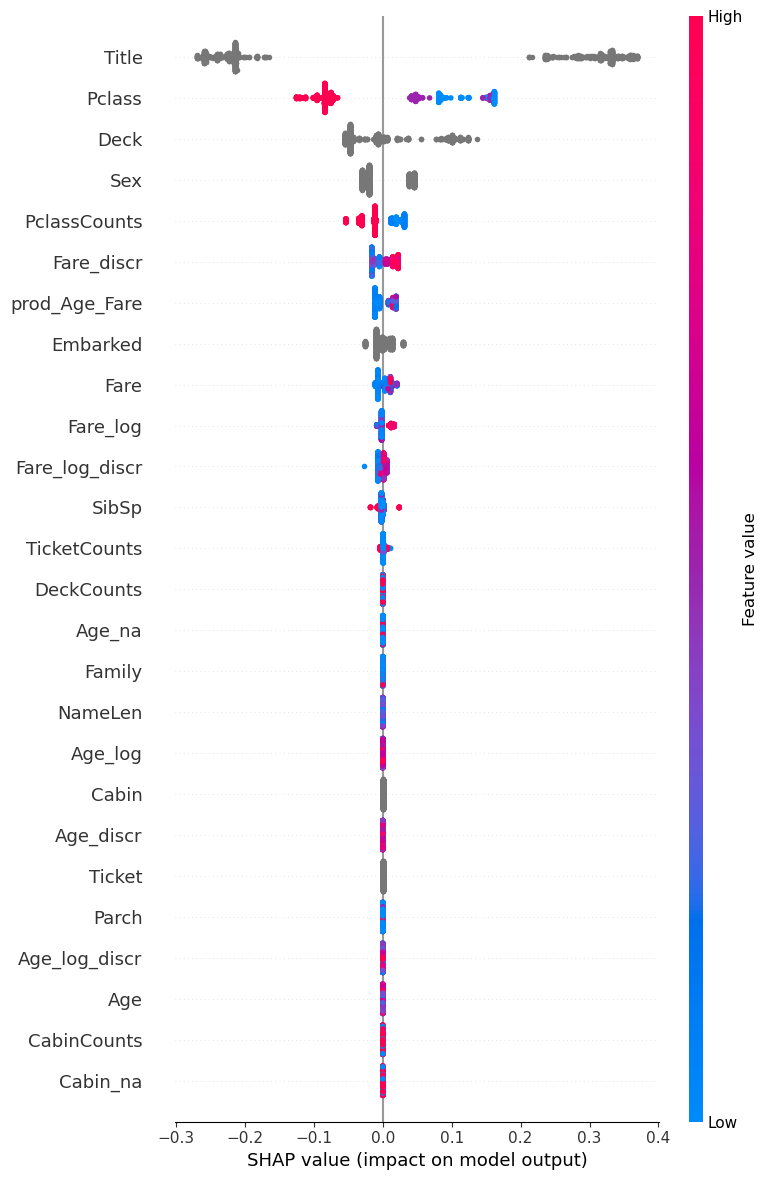

In [39]:
shap.summary_plot(shap_values, X_train, max_display=X_train.shape[1])

### Настройка гиперпараметров для модели с новыми признаками

In [40]:
def objective(trial):
    
    model_params = dict(
        iterations=2000,
        depth=trial.suggest_int("depth", 1, 7),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 10, 1000, log=True),
        loss_function=metrics.Logloss(),
        cat_features=[
            'Title', 
            'Pclass', 
            'Sex', 
            'Ticket', 
            'Cabin', 
            'Embarked', 
            'Age_na', 
            'Cabin_na',
            'Deck',
        ],
        eval_metric="Accuracy",
        verbose=False
    )
    
    
    model = CatBoostClassifier(**model_params)
    
    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")

    model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=100,
        callbacks=[pruning_callback],
    )
    
    pruning_callback.check_pruned()
    
    return accuracy_score(y_test, model.predict(X_test))

In [41]:
study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),
    direction='maximize'
)
study.optimize(objective, n_trials=N_TRIALS)

[I 2023-11-12 08:20:37,213] A new study created in memory with name: no-name-7f795ac2-3d9e-42e5-850b-f1f4502db135
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:37,477] Trial 0 finished with value: 0.8100558659217877 and parameters: {'depth': 6, 'l2_leaf_reg': 54.04255610673111}. Best is trial 0 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:37,757] Trial 1 finished with value: 0.8044692737430168 and parameters: {'depth': 3, 'l2_leaf_reg': 329.00663711122047}. Best is trial 0 with value: 0.8100558659217877.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:37,941] Trial 2 finished with value: 0.8044692737430168 and parameters: {'depth': 2, 'l2_leaf_reg': 12.65106239980174}. Best is trial 0 with value: 0.8100558659217877.
CatBoo

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:47,497] Trial 29 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 35.69334912163047}. Best is trial 28 with value: 0.8268156424581006.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:47,870] Trial 30 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 14.009016339767856}. Best is trial 28 with value: 0.8268156424581006.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:48,206] Trial 31 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 10.033102029984953}. Best is trial 28 with value: 0.8268156424581006.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:59,262] Trial 59 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 10.102753929527493}. Best is trial 28 with value: 0.8268156424581006.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:20:59,837] Trial 60 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 31.559860420163016}. Best is trial 28 with value: 0.8268156424581006.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:00,220] Trial 61 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 31.13362172684401}. Best is trial 28 with value: 0.8268156424581006.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:10,648] Trial 87 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 12.9610326907349}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:11,012] Trial 88 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 19.54070124079097}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:11,515] Trial 89 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 14.905462941379048}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:23,695] Trial 116 finished with value: 0.8268156424581006 and parameters: {'depth': 7, 'l2_leaf_reg': 17.93909822335235}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:24,172] Trial 117 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 24.009569660222372}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:24,695] Trial 118 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 11.1265971263811}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023

[I 2023-11-12 08:21:34,995] Trial 145 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 19.935132065383094}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:35,370] Trial 146 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 10.71537841377927}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:35,986] Trial 147 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 18.315867962330962}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:36,519] Trial 148 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:47,385] Trial 176 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 18.528658211342535}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:47,755] Trial 177 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 16.520574281588324}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:48,247] Trial 178 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 10.006553463787267}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:59,253] Trial 204 finished with value: 0.8100558659217877 and parameters: {'depth': 6, 'l2_leaf_reg': 15.525875848983356}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:21:59,587] Trial 205 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 38.910256108323864}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:00,046] Trial 206 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 13.48690175135798}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 20

[I 2023-11-12 08:22:11,204] Trial 233 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 13.607284181770611}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:11,523] Trial 234 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 19.291621024513656}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:11,835] Trial 235 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 22.769992747400774}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:12,203] Trial 236 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:23,690] Trial 265 finished with value: 0.8100558659217877 and parameters: {'depth': 5, 'l2_leaf_reg': 20.597976399006992}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:24,212] Trial 266 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 23.596294408988808}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:24,758] Trial 267 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 15.975986025395697}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:35,685] Trial 295 finished with value: 0.8324022346368715 and parameters: {'depth': 7, 'l2_leaf_reg': 16.216326274792895}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:36,064] Trial 296 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 13.109065288996916}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:36,541] Trial 297 finished with value: 0.8268156424581006 and parameters: {'depth': 7, 'l2_leaf_reg': 16.206536488546043}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2

[I 2023-11-12 08:22:47,801] Trial 323 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 20.92661322585043}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:48,033] Trial 324 pruned. Trial was pruned at iteration 73.
[I 2023-11-12 08:22:48,411] Trial 325 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 10.765498708153753}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:48,945] Trial 326 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 15.122267191217485}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:22:48,978] Tr

[I 2023-11-12 08:23:00,188] Trial 356 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 10.559276745035337}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:00,564] Trial 357 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 18.991879620371684}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:01,185] Trial 358 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 13.667943415730202}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:01,228] Trial 359 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:23:01,737] Tr

[I 2023-11-12 08:23:13,088] Trial 389 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 14.613929132432052}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:13,468] Trial 390 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 18.671458521562826}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:13,989] Trial 391 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 58.5511019851848}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:14,577] Trial 392 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:25,692] Trial 419 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:23:26,049] Trial 420 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 25.605217684743298}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:26,649] Trial 421 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 33.85529638906365}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:27,010] Trial 422 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 15.77015349596294}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is exper

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:37,553] Trial 455 finished with value: 0.8212290502793296 and parameters: {'depth': 5, 'l2_leaf_reg': 14.388012786520505}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:38,087] Trial 456 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 25.29103175664402}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:38,440] Trial 457 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 18.271553904924865}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 20

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:50,507] Trial 486 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 36.781992557006724}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:50,911] Trial 487 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 29.5790062668036}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:23:51,550] Trial 488 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 10.997292283908676}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 202

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:02,576] Trial 522 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 33.34495897180711}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:02,986] Trial 523 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 30.927370085207777}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:03,635] Trial 524 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 27.417003659728824}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 20

[I 2023-11-12 08:24:14,501] Trial 559 finished with value: 0.8268156424581006 and parameters: {'depth': 7, 'l2_leaf_reg': 16.371291380728614}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:14,687] Trial 560 pruned. Trial was pruned at iteration 53.
[I 2023-11-12 08:24:14,735] Trial 561 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:24:15,114] Trial 562 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 12.092203431863293}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:15,161] Trial 563 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:24:15,556] Trial 564 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 14.00082742021777}. Best is trial 81 with valu

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:26,773] Trial 593 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:24:27,328] Trial 594 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 22.67886205929575}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:27,812] Trial 595 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 12.582295592710853}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:28,376] Trial 596 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 17.681306549299855}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is expe

[I 2023-11-12 08:24:40,175] Trial 628 finished with value: 0.8156424581005587 and parameters: {'depth': 5, 'l2_leaf_reg': 16.008629068511677}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:40,579] Trial 629 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 27.099665024636167}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:40,621] Trial 630 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:24:40,983] Trial 631 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 285.45626333906927}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:41,369] Tr

[I 2023-11-12 08:24:51,490] Trial 663 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 14.849597194423964}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:52,029] Trial 664 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 19.766148377521475}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:52,067] Trial 665 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:24:52,456] Trial 666 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 10.879180262518169}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:24:52,503] Tr

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:02,741] Trial 702 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 16.20027840368562}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:03,129] Trial 703 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 11.646804565030983}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:03,494] Trial 704 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 21.990951863650146}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 20

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:14,440] Trial 735 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:25:15,126] Trial 736 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 36.268452397156274}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:15,693] Trial 737 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 25.581284958454805}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:16,132] Trial 738 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 307.8228095302486}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is expe

[I 2023-11-12 08:25:28,585] Trial 766 finished with value: 0.8100558659217877 and parameters: {'depth': 4, 'l2_leaf_reg': 15.302705437927171}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:28,960] Trial 767 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 40.00058781622775}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:29,280] Trial 768 finished with value: 0.8100558659217877 and parameters: {'depth': 6, 'l2_leaf_reg': 32.69055136950647}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:29,675] Trial 769 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:40,013] Trial 804 finished with value: 0.8100558659217877 and parameters: {'depth': 6, 'l2_leaf_reg': 24.858371344471866}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:40,411] Trial 805 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 19.12239156713104}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:40,955] Trial 806 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 23.574062788718923}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 20

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:52,453] Trial 840 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:25:53,140] Trial 841 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 36.75431155790322}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:53,503] Trial 842 finished with value: 0.8100558659217877 and parameters: {'depth': 7, 'l2_leaf_reg': 38.34003961934892}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:25:54,096] Trial 843 finished with value: 0.8212290502793296 and parameters: {'depth': 7, 'l2_leaf_reg': 34.19082803396127}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experi

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:05,580] Trial 878 finished with value: 0.8156424581005587 and parameters: {'depth': 7, 'l2_leaf_reg': 31.321088518174275}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:05,935] Trial 879 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 19.374824670413837}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:05,985] Trial 880 pruned. Trial was pruned at iteration 5.
[I 2023-11-12 08:26:06,314] Trial 881 finished with value: 0.8100558659217877 and parameters: {'depth': 6, 'l2_leaf_reg': 35.1534825689384}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is exper

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:17,939] Trial 918 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 12.14795316718426}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:18,588] Trial 919 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 11.019120240275116}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:19,058] Trial 920 finished with value: 0.8268156424581006 and parameters: {'depth': 6, 'l2_leaf_reg': 12.23960004889956}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 202

[I 2023-11-12 08:26:30,427] Trial 949 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 13.362426310255467}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:30,859] Trial 950 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 14.455500429987564}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:31,094] Trial 951 pruned. Trial was pruned at iteration 73.
[I 2023-11-12 08:26:31,463] Trial 952 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 47.34826362264543}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:31,935] Tr

CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:43,636] Trial 983 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 11.367114757621415}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:44,065] Trial 984 finished with value: 0.8156424581005587 and parameters: {'depth': 6, 'l2_leaf_reg': 103.49095877192104}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
[I 2023-11-12 08:26:44,252] Trial 985 pruned. Trial was pruned at iteration 73.
[I 2023-11-12 08:26:44,789] Trial 986 finished with value: 0.8212290502793296 and parameters: {'depth': 6, 'l2_leaf_reg': 10.619384799303967}. Best is trial 81 with value: 0.8324022346368715.
CatBoostPruningCallback is ex

In [42]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.8324022346368715
  Params: 
    depth: 6
    l2_leaf_reg: 12.528316059596833


### Важность признаков

In [46]:
model = CatBoostClassifier(
    iterations=2000,
    depth=trial.params['depth'],
    l2_leaf_reg=trial.params['l2_leaf_reg'],
    loss_function=metrics.Logloss(),
    cat_features=[
        'Title', 
        'Pclass', 
        'Sex', 
        'Ticket', 
        'Cabin', 
        'Embarked', 
        'Age_na', 
        'Cabin_na',
        'Deck',
    ],
    eval_metric="Accuracy",
    verbose=False
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=150,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [47]:
shap_values = model.get_feature_importance(
    Pool(
        X_train, 
        y_train,
        cat_features=[
            'Title', 
            'Pclass', 
            'Sex', 
            'Ticket', 
            'Cabin', 
            'Embarked', 
            'Age_na', 
            'Cabin_na',
            'Deck',
        ],
    ), 
    type='ShapValues'
)

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.force_plot(expected_value, shap_values, X_train)

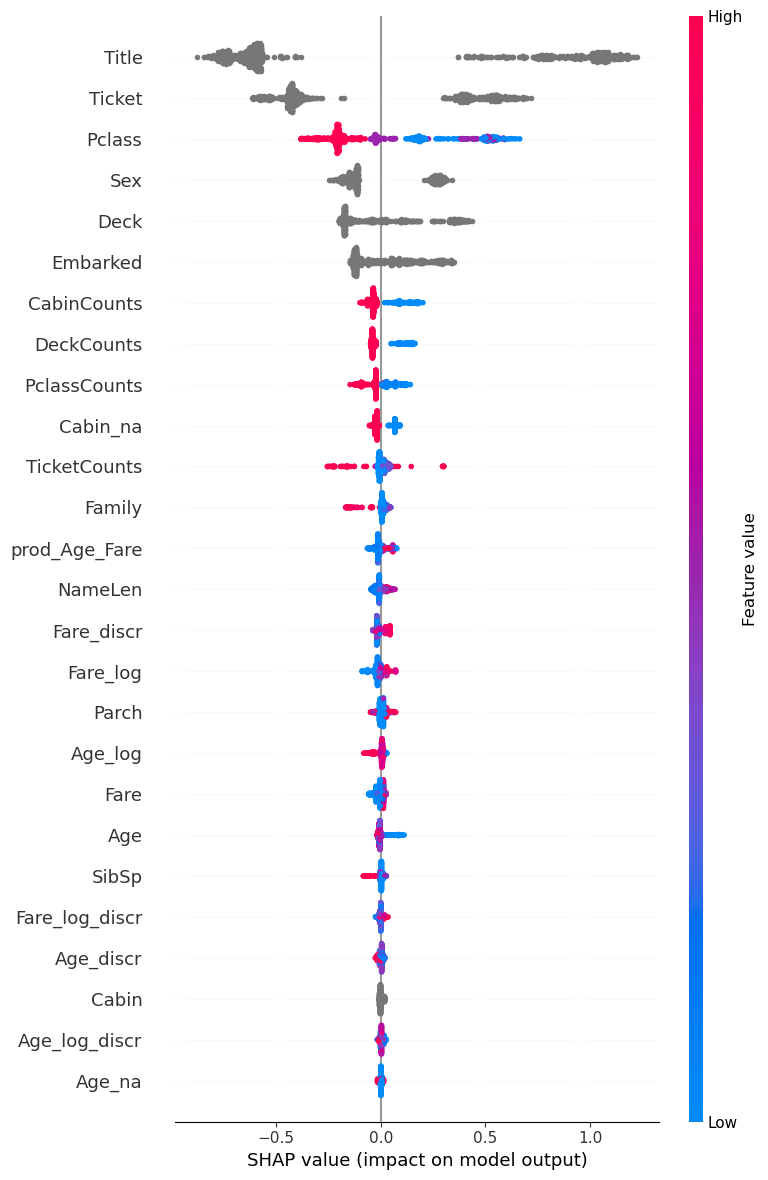

In [48]:
shap.summary_plot(shap_values, X_train, max_display=X_train.shape[1])

In [50]:
(
    pd.
    DataFrame(
        model.get_feature_importance(
            Pool(
                X_train, 
                y_train,
                cat_features=[
                    'Title', 
                    'Pclass', 
                    'Sex', 
                    'Ticket', 
                    'Cabin', 
                    'Embarked', 
                    'Age_na', 
                    'Cabin_na',
                    'Deck',
                ],
            ), 
        ),
        index=X_train.columns
    )
    .reset_index()
    .rename(columns={'index': 'feature', 0: 'importance'})
    .sort_values(by='importance', ascending=False)
)

feature  importance
10           Title   36.203180
5           Ticket   12.280352
1              Sex   10.212543
0           Pclass    9.757600
13            Deck    4.779682
22    TicketCounts    3.341922
25    PclassCounts    3.174530
8         Embarked    2.731179
20   prod_Age_Fare    2.215633
23     CabinCounts    1.926133
21          Family    1.821679
9          NameLen    1.458287
24      DeckCounts    1.201306
15        Fare_log    1.066193
12        Cabin_na    1.001057
14         Age_log    0.956869
3            SibSp    0.869058
6             Fare    0.825966
2              Age    0.817289
4            Parch    0.813150
17      Fare_discr    0.758184
18   Age_log_discr    0.516289
16       Age_discr    0.494916
19  Fare_log_discr    0.421671
11          Age_na    0.222067
7            Cabin    0.133263

- https://www.kaggle.com/code/cdeotte/titanic-using-name-only-0-81818
- https://www.kaggle.com/code/cdeotte/titanic-wcg-xgboost-0-84688/notebook
- https://www.kaggle.com/code/cdeotte/titantic-mega-model-0-84210/notebook